In [1]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv


In [2]:
df = pd.read_csv("result_mbed-os.csv", header=1, encoding='utf-8')
display(df)

,Unnamed: 0,emilmont@gmail.com,emilmont@gmail.com.1,samuel.mokrani@gmail.com,joe@oampo.co.uk,andreas.rebert@embeddedartists.com,c0170@rocketmail.com,bogdan.marinescu@arm.com,matthewelse1997@gmail.com,ytsuboi@gmail.com,...,Ahmet.Polat@maximintegrated.com,126816223+alrvid@users.noreply.github.com,cyliang@nuvoton.com.1,mak22223@ya.ru,joseph@avidbots.com,cyliang@nuvoton.com.2,danielzhang@mxic.com.cn,adamg@esdemc.com,davidalto97@gmail.com,matthias.goebel@biotronik.com
0,libraries/tests,0.0,0.0,0.0,0.0,0.0,14.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,libraries/tests/mbed,0.0,0.0,0.0,0.0,0.0,8.536585,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,libraries/tests/mbed/analog,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,libraries/tests/mbed/analog/main.cpp,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,libraries/tests/mbed/digitalin_digitalout,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,connectivity/drivers/lora/TARGET_STM32WL/STM32...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2053,storage/kvstore,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2054,storage/kvstore/kv_config,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,storage/kvstore/kv_config/source,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Extrair os nomes dos autores, ignorando a primeira coluna
autores = df.columns[1:].tolist()
print(autores)

# Inicializar dicionários para contar arquivos por desenvolvedor e desenvolvedores por arquivo
arquivos_por_responsavel = {autor: 0 for autor in autores}
responsaveis_por_arquivo = {}

# Iterar sobre cada autor
for autor in autores:
    arquivos = []
    for index, row in df.iterrows():
        try:
            ownership = float(row[autor])
        except ValueError:
            ownership = 0.0
        if ownership > 0:  # Se a posse do arquivo for maior que 0%
            arquivo = row['Unnamed: 0']
            arquivos.append(arquivo)
            arquivos_por_responsavel[autor] += 1  # Incrementar contador de arquivos do desenvolvedor
            
            # Incrementar contador de desenvolvedores do arquivo
            if arquivo in responsaveis_por_arquivo:
                responsaveis_por_arquivo[arquivo].add(autor)
            else:
                responsaveis_por_arquivo[arquivo] = {autor}
    
    if arquivos:  # Só imprimir se houver arquivos
        print(f"Arquivos de {autor}: {arquivos}")
    else:
        print(f"Arquivos de {autor}: Nenhum arquivo encontrado")




['emilmont@gmail.com', 'emilmont@gmail.com.1', 'samuel.mokrani@gmail.com', 'joe@oampo.co.uk', 'andreas.rebert@embeddedartists.com', 'c0170@rocketmail.com', 'bogdan.marinescu@arm.com', 'matthewelse1997@gmail.com', 'ytsuboi@gmail.com', 'toyomasa.watarai@arm.com', 'matthewelse1997@gmail.com.1', 'jaerts@teslamotors.com', 'adamgr@foo.bar', 'git@pbrier.nl', 'audgit@gmail.com', 'andre@Titan2.ea.local', 'xiongyihui3@gmail.com', 'bco.stm@gmail.com', 'od.81.28+hototogi@gmail.com', 'mazgch@gmail.com', 'triffid.hunter@gmail.com', 'tuze.kuyucu@nordicsemi.no', 'joey.ye@arm.com', 'erik_olieman@hotmail.com', 'neilt66@icloud.com', 'chielderoest@gmail.com', 'sam.w.grove@gmail.com', 'olivier.martin.fr@gmail.com', 'przemyslaw.wirkus@arm.com', 'donatien.garnier@appnearme.com', 'fatih.asici@gmail.com', 'peterd@netcologne.de', 'ban4jp@gmail.com', 'paulstaron@hotmail.co.uk', 'neilt66@icloud.com.1', 'contact@microbuilder.eu', 'wm@smode.org', 'dbe.stm13@gmail.com', 'christian.faurebouvard@gmail.com', 'hollie@li

In [13]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values() if count > 0)
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de responsáveis: {total_responsaveis}")

Total de responsáveis: 223


In [12]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values())
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de contribuidores: {total_responsaveis}")

Total de contribuidores: 731


In [5]:
# Caminho do arquivo CSV de saída
output_file = 'contagem_arquivos_por_responsavel_mbed-os.csv'

# Escrever contagem de arquivos por responsavel em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Responsável', 'Descrição'])

    for autor, count in arquivos_por_responsavel.items():
        if count == 1:
            writer.writerow([autor, f"{count}"])
        else:
            writer.writerow([autor, f"{count}"])

print(f"Contagem de arquivos por desenvolvedor salva em {output_file}")



Contagem de arquivos por desenvolvedor salva em contagem_arquivos_por_responsavel_mbed-os.csv


In [6]:
data = pd.read_csv("contagem_arquivos_por_responsavel_mbed-os.csv", encoding='utf-8')
display(data)

,Responsável,Descrição
0,emilmont@gmail.com,18
1,emilmont@gmail.com.1,0
2,samuel.mokrani@gmail.com,0
3,joe@oampo.co.uk,0
4,andreas.rebert@embeddedartists.com,0
...,...,...
726,cyliang@nuvoton.com.2,0
727,danielzhang@mxic.com.cn,0
728,adamg@esdemc.com,0
729,davidalto97@gmail.com,2


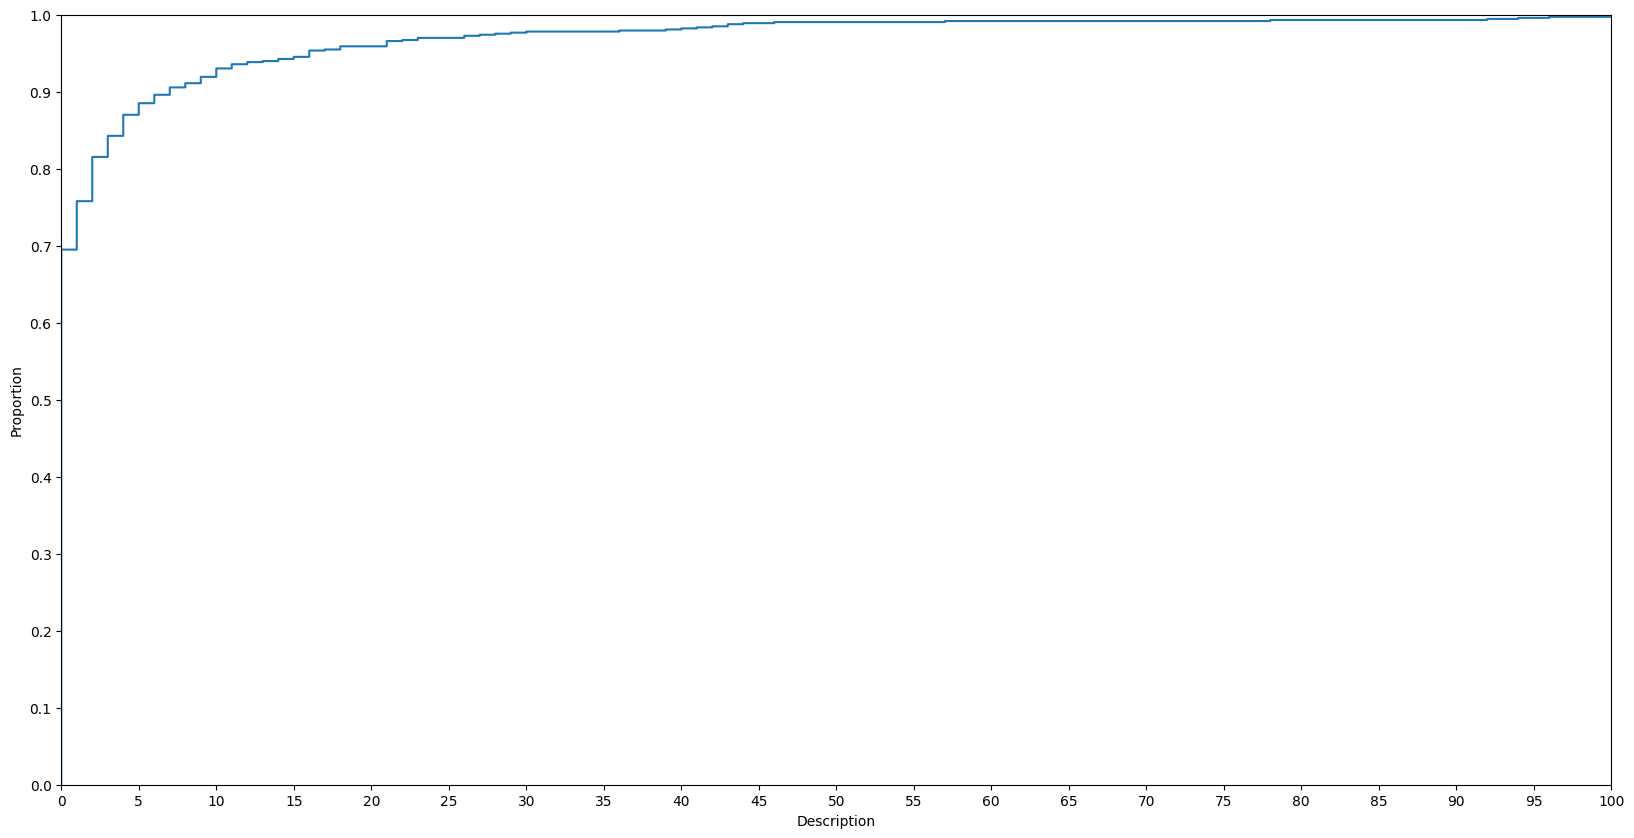

In [7]:
# Converter a coluna "Descrição" para valores numéricos
data['Descrição'] = pd.to_numeric(data['Descrição'], errors='coerce')

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF
sns.ecdfplot(data=data, x='Descrição')


plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Description') # Definir o rótulo do eixo x

# Ajustar a escala do eixo x
plt.xlim(0, 100)  # Ajuste os valores conforme necessário

# Ajustar os ticks do eixo x para que sejam de 5 em 5
plt.xticks(np.arange(0, 101, 5))

# Exibir o gráfico
plt.show()

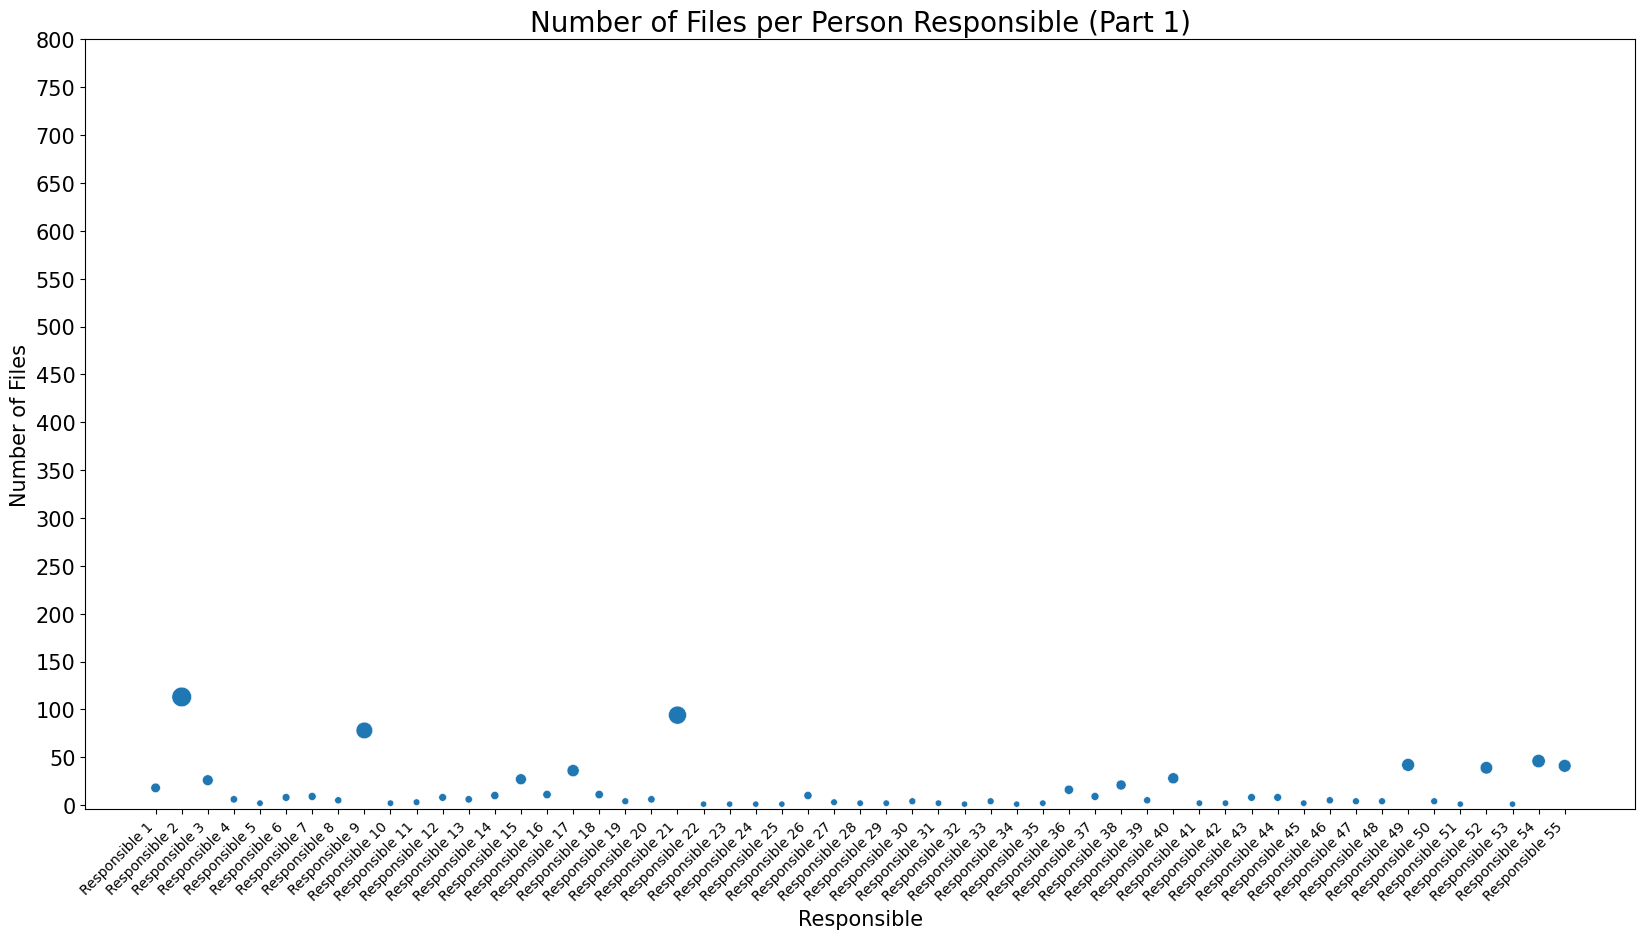

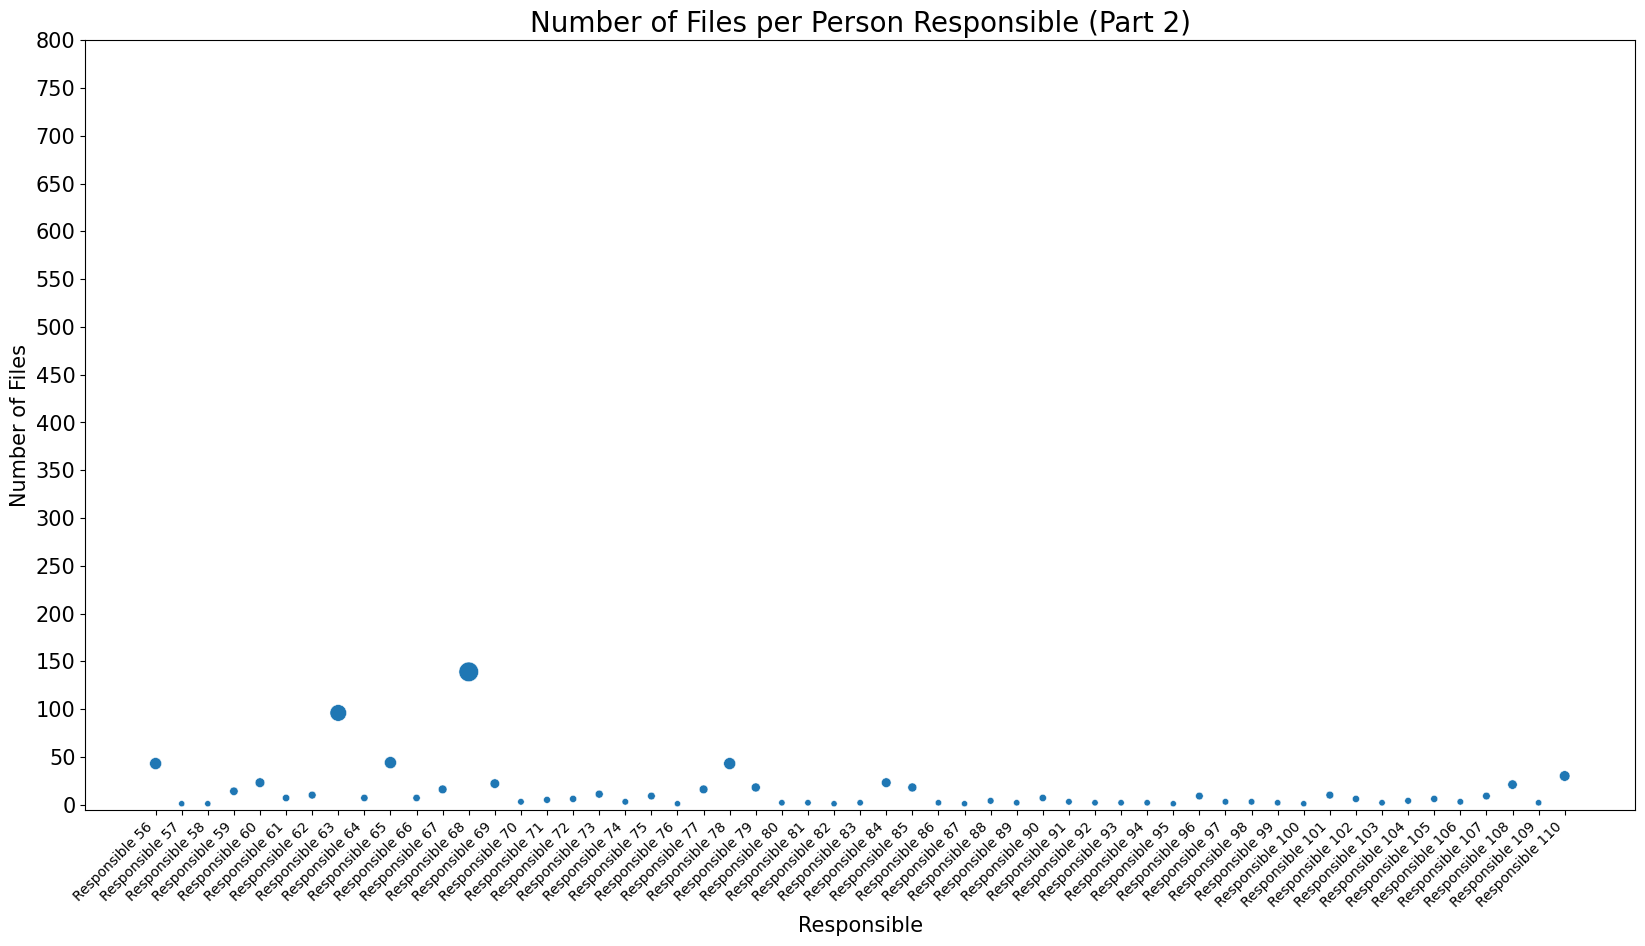

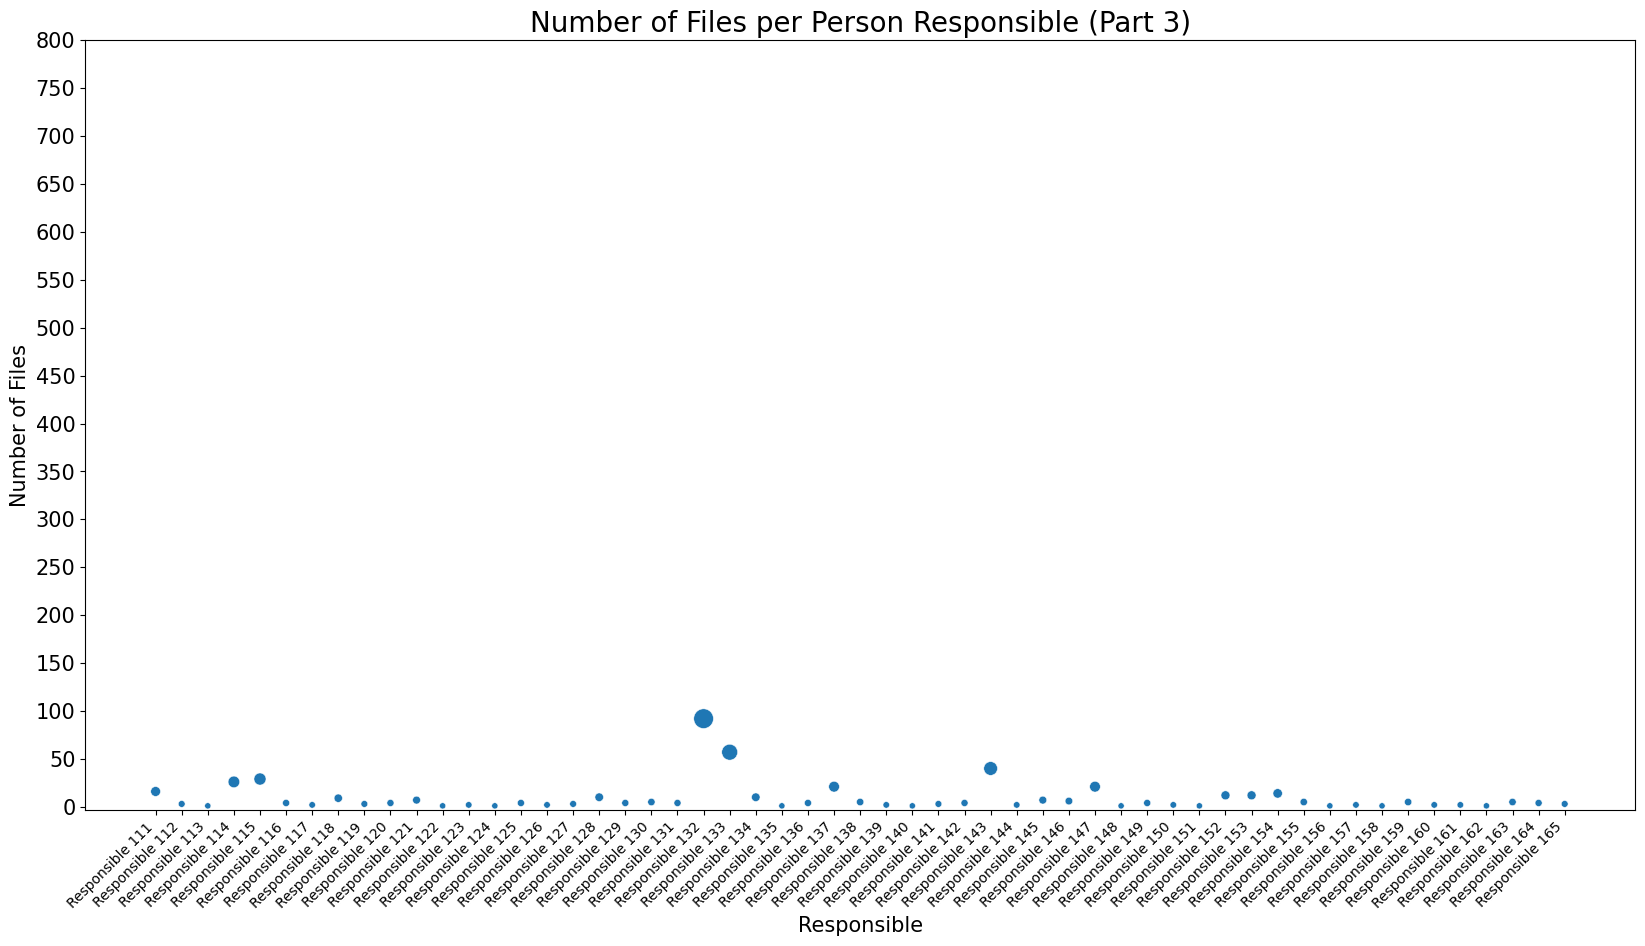

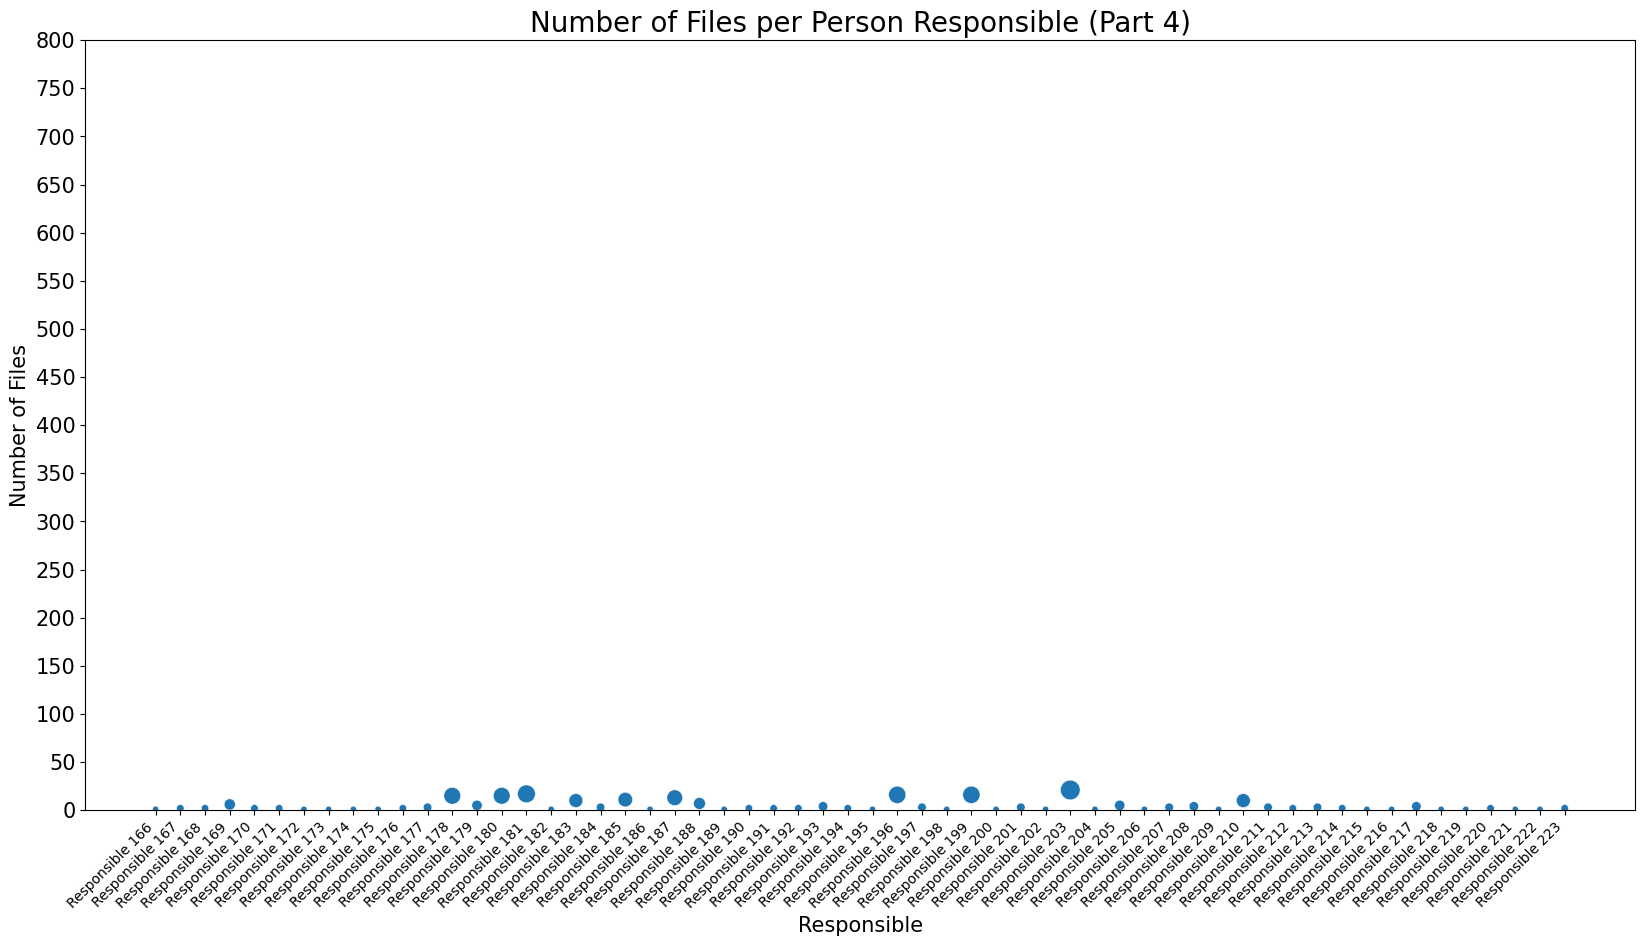

In [8]:
# Filtrar os dados para mostrar apenas aqueles com mais de 0 arquivos
filtered_data = data[data['Descrição'] > 0].copy()

# Substituir e-mails por "Responsável 1", "Responsável 2", etc.
filtered_data['Responsável'] = ['Responsible {}'.format(i+1) for i in range(len(filtered_data))]

# Criar uma coluna "Tamanho" para o tamanho das bolhas
filtered_data['Tamanho'] = filtered_data['Descrição'] * 10  # Ajuste conforme necessário

# Dividir os dados em quatro subconjuntos
part_size = len(filtered_data) // 4
data_part1 = filtered_data.iloc[:part_size]
data_part2 = filtered_data.iloc[part_size:2*part_size]
data_part3 = filtered_data.iloc[2*part_size:3*part_size]
data_part4 = filtered_data.iloc[3*part_size:]

# Gráfico 1
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part1, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 1)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)

# Exibir o primeiro gráfico
plt.show()

# Gráfico 2
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part2, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 2)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)

# Exibir o segundo gráfico
plt.show()

# Gráfico 3
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part3, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 3)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)

# Exibir o terceiro gráfico
plt.show()

# Gráfico 4
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part4, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 4)', fontsize=20)
plt.yticks(np.arange(0, 801, 50), fontsize=15)

# Exibir o quarto gráfico
plt.show()

In [9]:
# Contar número de responsáveis por arquivo
num_responsaveis_por_arquivo = {arquivo: len(responsaveis) 
                                   for arquivo, responsaveis in responsaveis_por_arquivo.items()}
# Caminho do arquivo CSV de saída
output_file = 'contagem_responsaveis_por_arquivo_mbed-os.csv'

# Escrever contagem de desenvolvedores por arquivo em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Arquivo', 'Descrição'])

    for arquivo, count in num_responsaveis_por_arquivo.items():
        if count > 1:
            writer.writerow([arquivo, f"{count} "])
        else:
            writer.writerow([arquivo, f"{count} "])

print(f"Contagem de desenvolvedores por arquivo salva em {output_file}")

Contagem de desenvolvedores por arquivo salva em contagem_responsaveis_por_arquivo_mbed-os.csv


In [10]:
data = pd.read_csv("contagem_responsaveis_por_arquivo_mbed-os.csv", encoding='utf-8')
display(data)

,Arquivo,Descrição
0,libraries/rtos,4
1,libraries/rtos/rtx,4
2,libraries/net,4
3,libraries/net/lwip,2
4,libraries/net/lwip/lwip,2
...,...,...
1233,connectivity/libraries/ppp/source/ppp_service.cpp,1
1234,connectivity/drivers/ble/FEATURE_BLE/COMPONENT...,1
1235,connectivity/drivers/lora/TARGET_STM32WL,1
1236,connectivity/drivers/lora/TARGET_STM32WL/STM32...,1


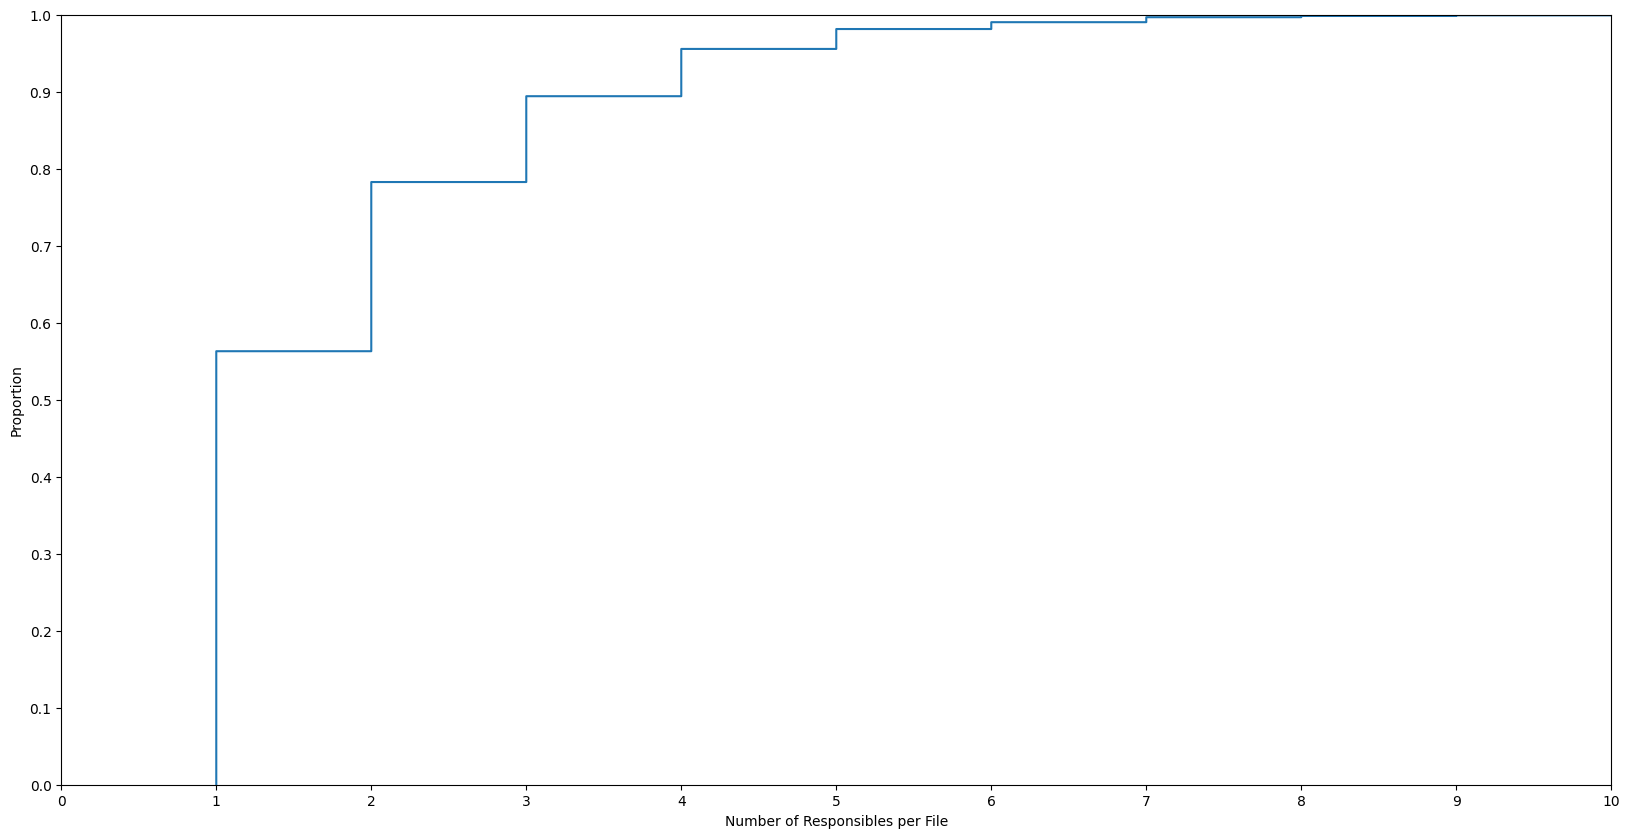

In [11]:
# Converter o dicionário para um DataFrame
data_responsaveis = pd.DataFrame(list(num_responsaveis_por_arquivo.items()), columns=['Arquivo', 'Contagem'])

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF para a contagem de responsáveis por arquivo
sns.ecdfplot(data=data_responsaveis, x='Contagem')

plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Number of Responsibles per File')  # Definir o rótulo do eixo x

# Ajustar a escala do eixo x, se necessário
plt.xlim(0, max(data_responsaveis['Contagem']))  # Ajuste conforme necessário

# Ajustar os ticks do eixo x para intervalos regulares, aqui ajustei para 1 em 1
plt.xticks(np.arange(0, max(data_responsaveis['Contagem'])+1, 1))

# Exibir o gráfico
plt.show()